# Stock Prediction Analysis on Netflix data (from 2017 to 2022) using Machine learning and python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings("ignore")

Import the data from local folder

In [2]:
os.chdir('C:/Users/Anjali Sonawane/Downloads/ML project')

In [3]:
df = pd.read_csv('NFLX (1).csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-24,143.610001,144.500000,143.399994,143.830002,143.830002,4800900
1,2017-04-25,147.460007,153.520004,146.220001,152.160004,152.160004,20674200
2,2017-04-26,151.529999,152.149994,148.899994,150.169998,150.169998,9274100
3,2017-04-27,150.600006,153.490005,149.300003,153.080002,153.080002,7719400
4,2017-04-28,152.710007,152.970001,150.940002,152.199997,152.199997,6366200


In [5]:
df.shape

(1260, 7)

Setting Date to index

In [6]:
df.set_index('Date', inplace= True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-24,143.610001,144.500000,143.399994,143.830002,143.830002,4800900
2017-04-25,147.460007,153.520004,146.220001,152.160004,152.160004,20674200
2017-04-26,151.529999,152.149994,148.899994,150.169998,150.169998,9274100
2017-04-27,150.600006,153.490005,149.300003,153.080002,153.080002,7719400
2017-04-28,152.710007,152.970001,150.940002,152.199997,152.199997,6366200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1260 entries, 2017-04-24 to 2022-04-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1260 non-null   float64
 1   High       1260 non-null   float64
 2   Low        1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Adj Close  1260 non-null   float64
 5   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,379.690690,385.318619,373.614040,379.608674,379.608674,7.599974e+06
std,130.203360,131.689985,128.499616,130.015992,130.015992,6.528626e+06
min,143.610001,144.500000,143.399994,143.830002,143.830002,1.144000e+06
25%,294.944992,298.947510,289.117493,294.157502,294.157502,4.257675e+06
50%,361.919998,367.214996,356.559998,361.785004,361.785004,5.891150e+06
75%,495.000000,502.797508,487.765007,494.352501,494.352501,9.013525e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


In [9]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<AxesSubplot:xlabel='Close'>

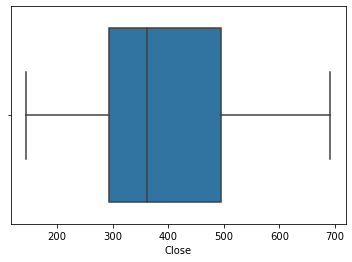

In [10]:
#finding the outlier
sns.boxplot(x=df['Close'])

# Data Visualization

[]

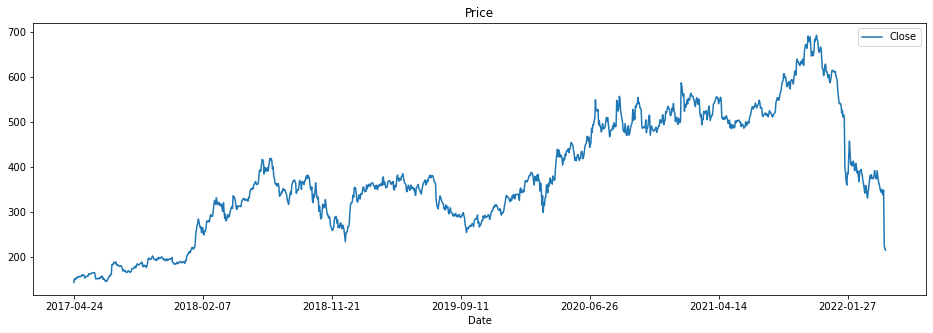

In [11]:
ax1 = df['Close'].plot(style = ['-'],figsize=(16,5))
plt.title('Price')
ax1.legend()
plt.plot()

Text(0.5, 1.0, ' Netflix Stock Plot for Overall Period')

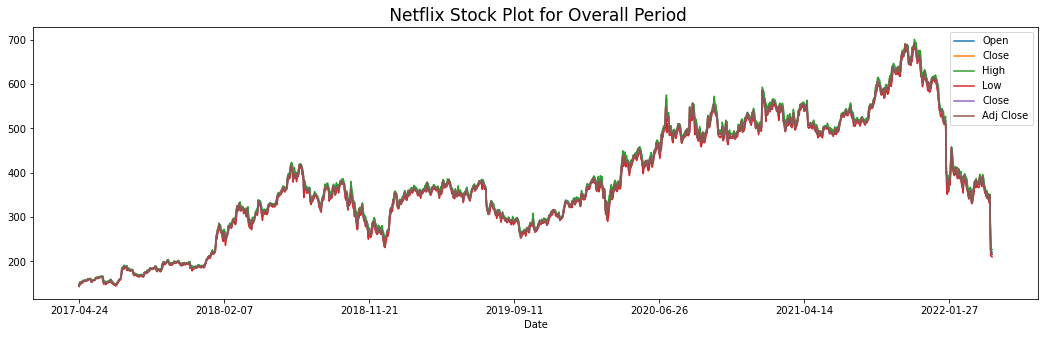

In [12]:
df[['Open', 'Close', 'High','Low','Close','Adj Close']].plot(figsize=(18,5))
plt.title(" Netflix Stock Plot for Overall Period", fontsize=17)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

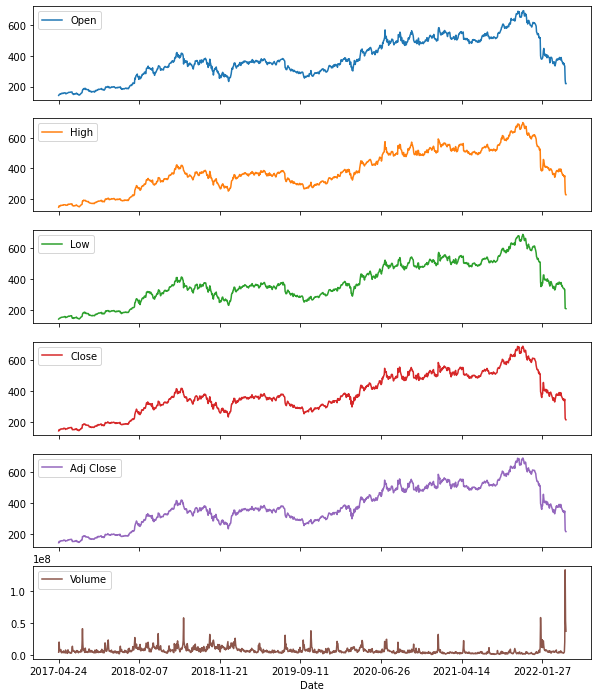

In [13]:
df.plot(subplots=True, figsize=(10,12))

Top-5 Dates with Highest Stock Price

In [14]:
a = df.sort_values(by='High',ascending= False).head(5)
a['High']

Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

Top-5 Dates with Lowest Stock Price

In [15]:
b = df.sort_values(by='Low',ascending= True).head(5)
b['Low']

Date
2017-04-24    143.399994
2017-07-06    144.250000
2017-07-05    145.580002
2017-07-03    145.800003
2017-04-25    146.220001
Name: Low, dtype: float64

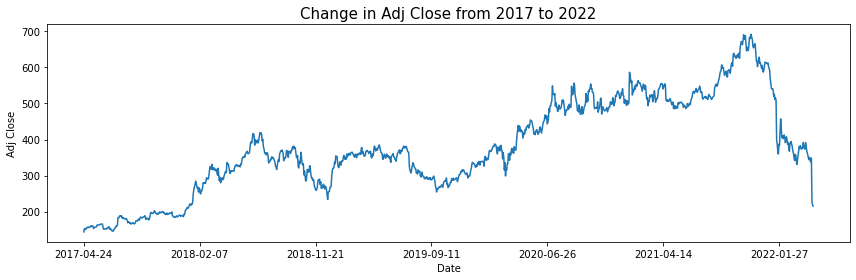

In [16]:
plt.figure(figsize=(12,4))
df['Adj Close'].plot()
plt.xlabel('Date', fontsize= 10)
plt.ylabel('Adj Close',fontsize= 10)
plt.title('Change in Adj Close from 2017 to 2022',fontsize= 15)
plt.tight_layout()

# Netflix stock Daily returns

In [17]:
df['Daily_returns'] = df['Adj Close'].pct_change() #Pandas dataframe.pct_change() function calculates the percentage change between the current and a prior element.
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns
Date,,,,,,,
2017-04-24,143.610001,144.500000,143.399994,143.830002,143.830002,4800900,NaN
2017-04-25,147.460007,153.520004,146.220001,152.160004,152.160004,20674200,0.057916
2017-04-26,151.529999,152.149994,148.899994,150.169998,150.169998,9274100,-0.013078
2017-04-27,150.600006,153.490005,149.300003,153.080002,153.080002,7719400,0.019378
2017-04-28,152.710007,152.970001,150.940002,152.199997,152.199997,6366200,-0.005749


 Best Day of Stock

In [18]:
df[df['Daily_returns']==df['Daily_returns'].max()]['Daily_returns']

Date
2021-01-20    0.168543
Name: Daily_returns, dtype: float64

 Worst day of Stock

In [19]:
df[df['Daily_returns']==df['Daily_returns'].min()]['Daily_returns']

Date
2022-04-20   -0.351166
Name: Daily_returns, dtype: float64

Text(0.5, 1.0, 'Netflix Stock Daily Returns')

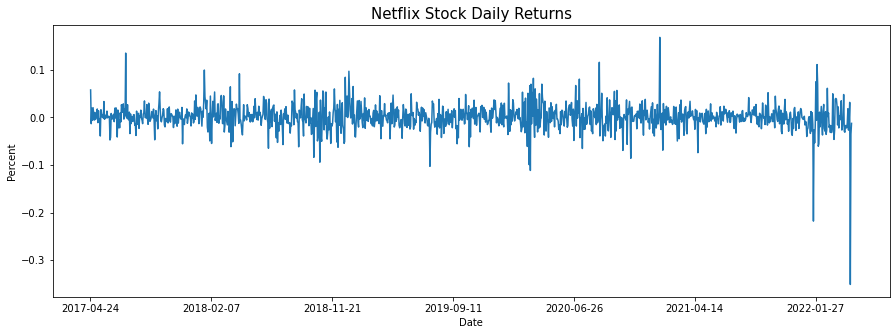

In [20]:
plt.figure(figsize=(15,5))
df['Daily_returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Netflix Stock Daily Returns",fontsize= 15 )

<AxesSubplot:>

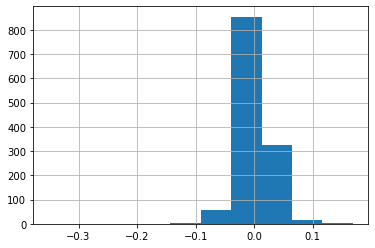

In [21]:
df['Daily_returns'].hist()

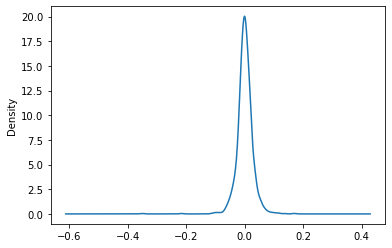

In [22]:
df['Daily_returns'].plot(kind ='kde')
plt.show()

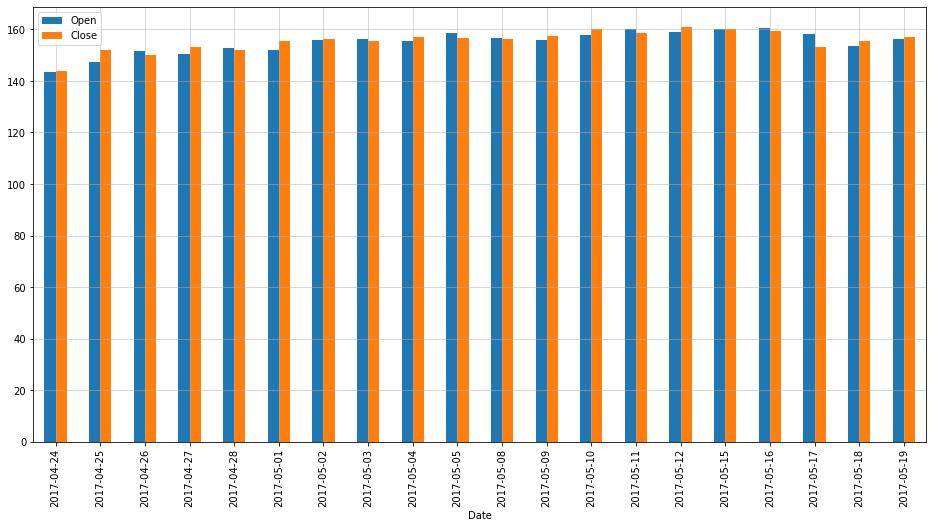

In [23]:
#Plot Open vs Close
df[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

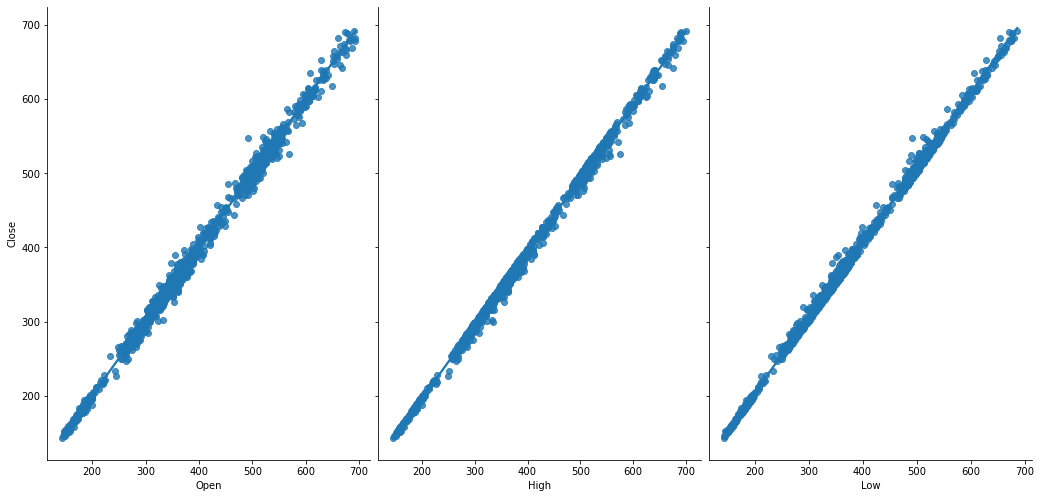

In [68]:
sns.pairplot(df, x_vars=['Open','High','Low'], y_vars='Close', height=7, aspect=0.7, kind='reg')
plt.show()

# Feature Selection

In [24]:
X= df[['Open', 'High', 'Low', 'Volume']]
y= df['Close']
print(X.shape) 
print(y.shape) 

(1260, 4)
(1260,)


# Train & Test Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25 ,random_state=1)

In [26]:
print(X_train.shape) 
print(X_test.shape)  
print(y_train.shape) 
print(y_test.shape) 
#y_test to be evaluated with y_pred for Diff models

(945, 4)
(315, 4)
(945,)
(315,)


# Linear Regression

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [28]:
regressor.fit(X_train,y_train)

LinearRegression()

In [29]:
print(regressor.coef_)

[-5.97138091e-01  7.96583745e-01  8.01206099e-01  5.18128830e-08]


In [30]:
print(regressor.intercept_)

-0.3121532958910507


In [31]:
predicted = regressor.predict(X_test)

In [32]:
print(X_test)

                  Open        High         Low    Volume
Date                                                    
2021-12-28  614.950012  618.409973  609.690002   1882800
2018-04-27  316.250000  317.450012  306.500000   7074400
2018-07-09  415.950012  419.119995  411.100006  11127500
2018-11-27  259.239990  269.079987  256.140015  11149500
2017-08-09  171.429993  175.960007  170.009995   9670500
...                ...         ...         ...       ...
2017-11-01  197.240005  199.199997  196.000000   5017400
2019-08-08  311.029999  316.359985  306.630005   5905900
2020-09-23  491.040009  491.040009  469.000000   3726400
2018-10-26  300.510010  313.989990  292.299988  19616000
2017-05-08  156.550003  157.639999  155.300003   4818800

[315 rows x 4 columns]


In [33]:
predicted.shape

(315,)

In [34]:
dframe = pd.DataFrame(y_test,predicted)

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="TV", y="Sales")
plt.plot(X_test["TV"],predicted)
plt.show()

In [35]:
dfr = pd.DataFrame({'Actual':y_test,'predicted':predicted})

In [36]:
print(dfr)

                Actual   predicted
Date                              
2021-12-28  610.710022  613.678004
2018-04-27  311.760010  309.654659
2018-07-09  418.970001  415.124805
2018-11-27  266.630005  265.029147
2017-08-09  175.779999  174.201451
...                ...         ...
2017-11-01  198.000000  197.884167
2019-08-08  315.899994  311.947040
2020-09-23  470.609985  473.582378
2018-10-26  299.829987  305.570090
2017-05-08  156.380005  156.456323

[315 rows x 2 columns]


In [37]:
dfr.head(15)

,Actual,predicted
Date,,
2021-12-28,610.710022,613.678004
2018-04-27,311.760010,309.654659
2018-07-09,418.970001,415.124805
2018-11-27,266.630005,265.029147
2017-08-09,175.779999,174.201451
2017-10-11,194.949997,194.827165
2020-12-04,498.309998,500.185492
2021-07-28,519.299988,520.204869
2019-04-12,351.140015,353.190302


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [39]:
regressor.score(X_test,y_test)

0.999380609711993

In [40]:
import math

In [41]:
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error : 2.4442501997391273


In [42]:
print('Mean Squared Error :',metrics.mean_squared_error(y_test,predicted))

Mean Squared Error : 10.662639852427239


In [43]:
print('Root Mean Squared Error :',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error : 3.2653697880067485


In [47]:
print('Mean Squared Error :',metrics.mean_squared_error(y_test,ypred1))

Mean Squared Error : 18.451267696681644


In [48]:
graph = dfr.head(20)

<AxesSubplot:xlabel='Date'>

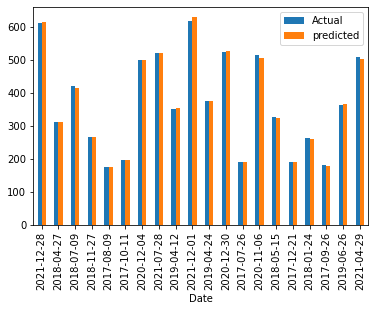

In [49]:
graph.plot(kind='bar')

# Standarization

In [50]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
print(X_train)
print(X_test)

[[ 0.91773963  0.99838805  0.96028948 -0.59950251]
 [ 0.04848875  0.08356739  0.05567367 -0.4629001 ]
 [-0.16890101 -0.1744668  -0.16750768  0.7223552 ]
 ...
 [ 1.3593078   1.37495753  1.41932514 -0.93922245]
 [-0.72548988 -0.69701442 -0.77533083  2.12195739]
 [ 1.22854981  1.17287565  1.235257   -1.05904494]]
[[ 1.80442473  1.7656296   1.8358051  -1.04034157]
 [-0.49984572 -0.52854895 -0.53595645 -0.08930892]
 [ 0.26927307  0.24646807  0.28229703  0.65316554]
 ...
 [ 0.84854208  0.79470497  0.73523076 -0.70261836]
 [-0.6212692  -0.55492425 -0.64703875  2.20814678]
 [-1.7318242  -1.74675985 -1.71874723 -0.50250509]]


# KNN Regressor 

In [51]:
from sklearn import model_selection
from sklearn.model_selection import KFold

In [52]:
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(X_train,y_train)
y_knn_pred=knn_model.predict(X_test)

In [53]:
knn_kfold = model_selection.KFold(n_splits=2, shuffle=True,random_state=100)
results_kfold = model_selection.cross_val_score(knn_model, X_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy:", results_kfold.mean()*100)

Accuracy: 98.67754468550962


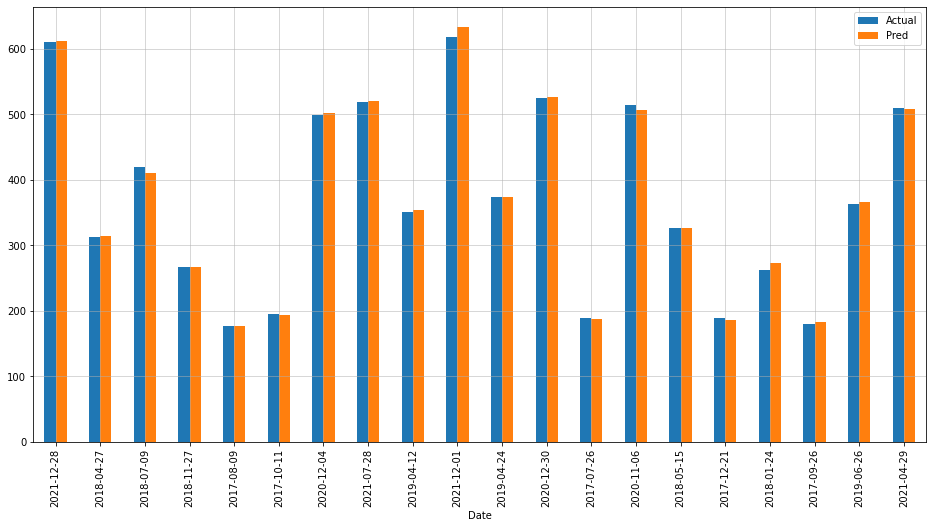

In [54]:
plot_knn_df=pd.DataFrame({'Actual':y_test,'Pred':y_knn_pred})
plot_knn_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

# Support Vector Machine = SVR

In [55]:
svm_regressor = SVR(kernel='linear')
svm_model=svm_regressor.fit(X_train,y_train)
y_svm_pred=svm_model.predict(X_test)

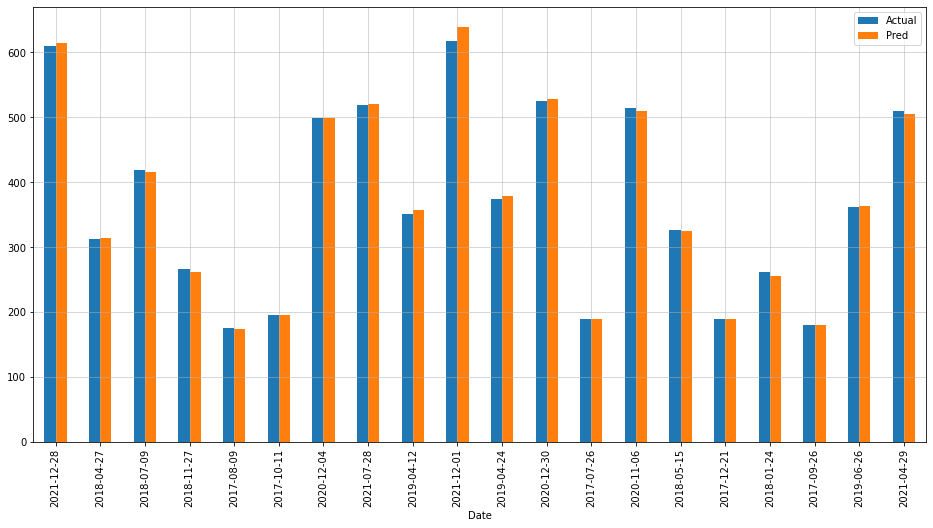

In [56]:
plot_svm_df=pd.DataFrame({'Actual':y_test,'Pred':y_svm_pred})
plot_svm_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

# Random Forest Regressor

In [57]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(predict)
print(predict.shape)

[611.68225973 312.10327006 415.14209509 267.10017688 171.95279863
 195.06319143 500.98139381 520.24982237 352.01560831 645.93108328
 375.6208415  530.47930598 188.09393547 506.6331876  324.38394006
 189.74008788 255.77309855 177.37833118 363.36164514 504.70735218
 167.05179953 517.42717418 195.94162739 552.06428068 533.12206721
 197.61321594 289.61438281 550.9314406  291.95198475 548.45066209
 549.47955948 313.07021532 298.34099984 491.78080029 515.343974
 525.19882251 334.44793319 504.1404769  363.09004898 501.2141843
 183.47519928 275.26608355 188.23431061 337.4258111  437.5509474
 475.672647   380.91788274 529.89029504 312.31097965 627.31709346
 487.83502137 342.86941148 515.66555019 184.19571588 663.3122764
 269.26352379 489.45096483 608.70175513 285.15144907 343.38811084
 471.30852453 488.53246252 185.42357075 268.63863021 367.59040301
 364.89405317 332.14951452 487.08902419 193.76048181 358.28053123
 186.80315476 288.97067423 267.08745256 198.96389384 492.00606353
 601.54168556 2

In [58]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict)))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict)))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict))))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict)))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 3
Mean Squared Error: 24
Root Mean Squared Error: 5
(R^2) Score: 1
Train Score : 99.98% and Test Score : 99.86% using Random Tree Regressor.
Accuracy: 99.05 %.


In [59]:
from sklearn.metrics import mean_squared_error , r2_score
import math

In [60]:
lr_mse=math.sqrt(mean_squared_error(y_test,predicted))
print('Linear Model Root mean square error',lr_mse)

Linear Model Root mean square error 3.2653697880067485


In [61]:
knn_mse=math.sqrt(mean_squared_error(y_test,y_knn_pred))
print('KNN Model Root mean square error',knn_mse)

KNN Model Root mean square error 10.706410305995357


In [62]:
svm_mse=math.sqrt(mean_squared_error(y_test,y_svm_pred))
print('SVM Model Root mean square error SVM',svm_mse)

SVM Model Root mean square error SVM 5.160849747885539


In [63]:
print('Linear R2: ', r2_score(y_test, predicted))
print('KNN R2: ', r2_score(y_test, y_knn_pred))
print('SVM R2: ', r2_score(y_test, y_svm_pred))

Linear R2:  0.999380609711993
KNN R2:  0.993341331151772
SVM R2:  0.9984528155871354


# Prediction

In [64]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")

#collecting future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

# One year prediction

Buy Date and Price of Stock
     Unnamed: 0  Predictions
144  2022-09-13   147.762864 

Sell Date and Price of stock
     Unnamed: 0  Predictions
204  2022-11-12   684.520888


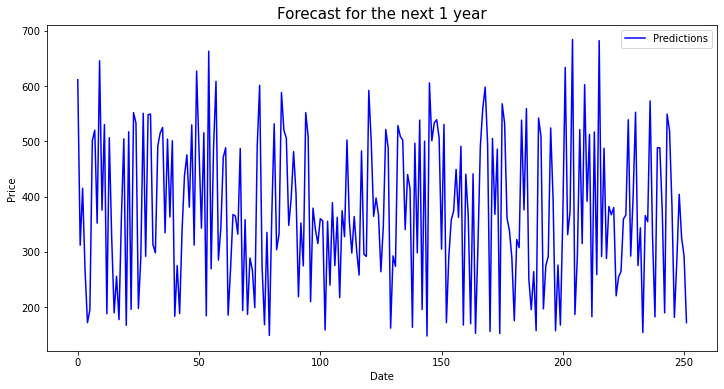

In [65]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy Date and Price of Stock")
print(oneyear_buy,'\n')
print("Sell Date and Price of stock")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(12, 6), color="blue")
plt.title("Forecast for the next 1 year", size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# One Month prediction

Buy price and date
    Unnamed: 0  Predictions
20  2022-05-12     167.0518 

Sell price and date
   Unnamed: 0  Predictions
9  2022-05-01   645.931083


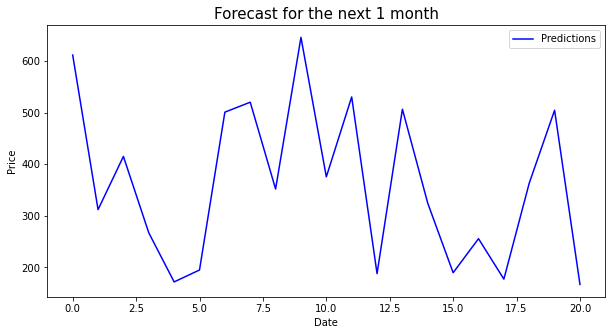

In [66]:
onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy,'\n')
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), color="blue")
plt.title("Forecast for the next 1 month", size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# 5 days prediction

Buy price and date
   Unnamed: 0  Predictions
4  2022-04-26   171.952799 

Sell price and date
   Unnamed: 0  Predictions
0  2022-04-22    611.68226


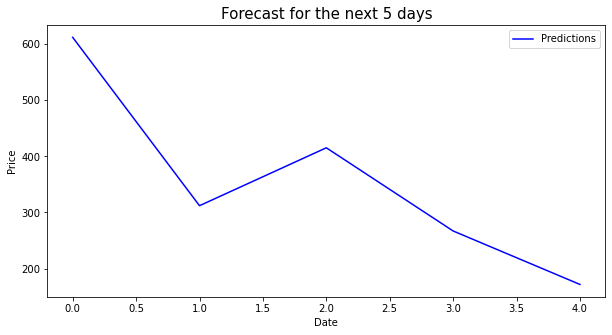

In [67]:
fivedays_df_pred = pd.read_csv("five-days-predictions.csv")
buy_price = min(fivedays_df_pred["Predictions"])
sell_price = max(fivedays_df_pred["Predictions"])
fivedays_buy = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == buy_price]
fivedays_sell = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy,'\n')
print("Sell price and date")
print(fivedays_sell)
fivedays_df_pred["Predictions"].plot(figsize=(10, 5), color="blue")
plt.title("Forecast for the next 5 days",size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()